In [1]:
import tensorflow as tf
import numpy as np
import matplotlib
import os
import matplotlib.pyplot as plt

tf.set_random_seed(777)

#Min Max Normalization
def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    return numerator / (denominator + 1e-7)

In [2]:
# train Parameters
seq_length = 7
data_dim = 6
hidden_dim = 10
output_dim = 1
learning_rate = 0.01

# bid ask low high volume
xy = np.genfromtxt('./data/bitcoin_ticker_eth_krw_hour.csv', delimiter=',', dtype=np.str)[:,[4,7,8,9,10,11]]
print(xy[0])

xy = xy[1:].astype(np.float)
xy = MinMaxScaler(xy[1:]) #normalize
x = xy[:]
y = xy[:,[0]]
print(x[:2])
print(y[:2])


['last' 'bid' 'ask' 'low' 'high' 'volume']
[[ 0.48537134  0.33471288  0.47987851  0.57107438  0.54615385  0.32157781]
 [ 0.55738935  0.38437662  0.55504935  0.57107438  0.52820513  0.32015694]]
[[ 0.48537134]
 [ 0.55738935]]


In [3]:
# build a dataset
dataX = []
dataY = []
for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]  # Next last price
    if i < 2 : print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)

[[ 0.48537134  0.33471288  0.47987851  0.57107438  0.54615385  0.32157781]
 [ 0.55738935  0.38437662  0.55504935  0.57107438  0.52820513  0.32015694]
 [ 0.52138035  0.35954475  0.53302961  0.57107438  0.52820513  0.32937215]
 [ 0.56939235  0.35799276  0.55960516  0.57107438  0.52820513  0.33856945]
 [ 0.45911478  0.31660631  0.45406226  0.57107438  0.52820513  0.34429369]
 [ 0.47336834  0.32177962  0.46089598  0.57107438  0.52820513  0.35179124]
 [ 0.42985746  0.29643042  0.43659833  0.57107438  0.51623932  0.34650965]] -> [ 0.4396099]
[[ 0.55738935  0.38437662  0.55504935  0.57107438  0.52820513  0.32015694]
 [ 0.52138035  0.35954475  0.53302961  0.57107438  0.52820513  0.32937215]
 [ 0.56939235  0.35799276  0.55960516  0.57107438  0.52820513  0.33856945]
 [ 0.45911478  0.31660631  0.45406226  0.57107438  0.52820513  0.34429369]
 [ 0.47336834  0.32177962  0.46089598  0.57107438  0.52820513  0.35179124]
 [ 0.42985746  0.29643042  0.43659833  0.57107438  0.51623932  0.34650965]
 [ 0.439

In [4]:
# train/test split
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])

print(trainX[:2])
print(trainY[:2])

[[[ 0.48537134  0.33471288  0.47987851  0.57107438  0.54615385  0.32157781]
  [ 0.55738935  0.38437662  0.55504935  0.57107438  0.52820513  0.32015694]
  [ 0.52138035  0.35954475  0.53302961  0.57107438  0.52820513  0.32937215]
  [ 0.56939235  0.35799276  0.55960516  0.57107438  0.52820513  0.33856945]
  [ 0.45911478  0.31660631  0.45406226  0.57107438  0.52820513  0.34429369]
  [ 0.47336834  0.32177962  0.46089598  0.57107438  0.52820513  0.35179124]
  [ 0.42985746  0.29643042  0.43659833  0.57107438  0.51623932  0.34650965]]

 [[ 0.55738935  0.38437662  0.55504935  0.57107438  0.52820513  0.32015694]
  [ 0.52138035  0.35954475  0.53302961  0.57107438  0.52820513  0.32937215]
  [ 0.56939235  0.35799276  0.55960516  0.57107438  0.52820513  0.33856945]
  [ 0.45911478  0.31660631  0.45406226  0.57107438  0.52820513  0.34429369]
  [ 0.47336834  0.32177962  0.46089598  0.57107438  0.52820513  0.35179124]
  [ 0.42985746  0.29643042  0.43659833  0.57107438  0.51623932  0.34650965]
  [ 0.4396

In [5]:
# input place holders
X = tf.placeholder(tf.float32, [None, seq_length, data_dim])
Y = tf.placeholder(tf.float32, [None, 1])

# build a LSTM network
cell = tf.contrib.rnn.BasicLSTMCell(num_units=hidden_dim, state_is_tuple=True, activation=tf.tanh)
outputs, _states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)
Y_pred = tf.contrib.layers.fully_connected(outputs[:, -1], output_dim, activation_fn=None)  # We use the last cell's output

# cost/loss
loss = tf.reduce_sum(tf.square(Y_pred - Y))  # sum of the squares

# optimizer
optimizer = tf.train.AdamOptimizer(learning_rate)
train = optimizer.minimize(loss)


[step: 0] loss: 283.86785888671875
[step: 1] loss: 123.39632415771484
[step: 2] loss: 25.72022247314453
[step: 3] loss: 5.948297500610352
[step: 4] loss: 44.064979553222656
[step: 5] loss: 69.80537414550781
[step: 6] loss: 64.31578063964844
[step: 7] loss: 43.30201721191406
[step: 8] loss: 22.014921188354492
[step: 9] loss: 8.462377548217773
[step: 10] loss: 4.181164741516113
[step: 11] loss: 6.780571460723877
[step: 12] loss: 12.54419231414795
[step: 13] loss: 18.209230422973633
[step: 14] loss: 21.74053955078125
[step: 15] loss: 22.386737823486328
[step: 16] loss: 20.392057418823242
[step: 17] loss: 16.61583709716797
[step: 18] loss: 12.176511764526367
[step: 19] loss: 8.15456771850586
[step: 20] loss: 5.360752582550049
[step: 21] loss: 4.183204650878906
[step: 22] loss: 4.534919261932373
[step: 23] loss: 5.921995639801025
[step: 24] loss: 7.626542568206787
[step: 25] loss: 8.952337265014648
[step: 26] loss: 9.444517135620117
[step: 27] loss: 8.999727249145508
[step: 28] loss: 7.8374

[step: 232] loss: 0.7655215263366699
[step: 233] loss: 0.7639626264572144
[step: 234] loss: 0.7624192237854004
[step: 235] loss: 0.7608938813209534
[step: 236] loss: 0.759385883808136
[step: 237] loss: 0.7578939199447632
[step: 238] loss: 0.7564181685447693
[step: 239] loss: 0.7549580335617065
[step: 240] loss: 0.7535146474838257
[step: 241] loss: 0.7520881295204163
[step: 242] loss: 0.7506775259971619
[step: 243] loss: 0.7492835521697998
[step: 244] loss: 0.7479040622711182
[step: 245] loss: 0.7465400695800781
[step: 246] loss: 0.7451912760734558
[step: 247] loss: 0.7438581585884094
[step: 248] loss: 0.7425405979156494
[step: 249] loss: 0.7412368655204773
[step: 250] loss: 0.7399488687515259
[step: 251] loss: 0.7386744022369385
[step: 252] loss: 0.7374146580696106
[step: 253] loss: 0.7361702919006348
[step: 254] loss: 0.7349410057067871
[step: 255] loss: 0.7337226867675781
[step: 256] loss: 0.7325215339660645
[step: 257] loss: 0.7313322424888611
[step: 258] loss: 0.7301568388938904
[s

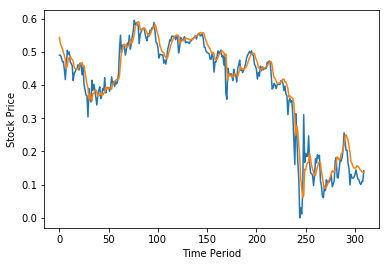

In [7]:
# train Parameters
iterations = 300

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    # Training step
    for i in range(iterations):
        _, step_loss = sess.run([train, loss], feed_dict={X: trainX, Y: trainY})
        print("[step: {}] loss: {}".format(i, step_loss))
        
    # Test step
    test_predict = sess.run(Y_pred, feed_dict={X: testX})
    
    # Plot predictions
    plt.plot(testY)
    plt.plot(test_predict)
    plt.xlabel("Time Period")
    plt.ylabel("Stock Price")
    plt.show()